# Introduction

Restaurants are constantly looking for ways to cut costs while continue to serve food with the same quality. You can do this by finding efficiencies in labour, production or raw materials. In this project, we will look at a dataset to determine whether we can run a model to more accurately predict when people will order a certain item. If it is completed effectively, this will allow the restaurant to do more accurate purchases. This help save costs by reducing waste and finding sales when making required purchases to meet the demand


In [1]:
# import libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import torch  # deep learning library   
from torch.nn import MSELoss  # mean-squared error (MSE) loss function
from matplotlib import pyplot as plt  # data visualization library 
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler  # feature scaling (standard normalization)
import os  # file handling library
pd.set_option('display.max_columns', None)  # displays all columns (wrap-around)

In [3]:
#### Here we look for the csv files to read into pandas dataframes and we summarise the data

# this will list all files that can be accessed
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# This is the function to read in the data from the csv files into pandas dataframes 
# and print out summary and statistics for each csv 
def pd_read_csv_stats_describe(fname=None, in_df=None):
    """ load csv file or read existing pandas dataframe and print out summary and statistics"""
    if fname is not None:                                          
        in_df = pd.read_csv(fname)
    elif in_df is None:
        raise ValueError('if fname is None, then a dataframe must be supplied in "in_df"')
    num = 10
    print(f'\n\n{fname} - data in first {num} rows')
    print(in_df.head(num))
    print(f'\n{fname} - summary of column statistics')
    print(in_df.describe(include='all'))  
    print(f'\n{fname} - correlation matrix (numeric columns only)')
    print(in_df.corr(numeric_only=True, method='pearson').round(2))
    print(f'shape of dataframe: {in_df.shape}')
    cols = in_df.columns
    print(f'\n{fname} - Number of unique values')
    for col in cols:
        print(f'{col}: {in_df[col].nunique()}')
    print(f'\n{fname} - Number of nans per column')
    print(in_df.isna().sum())
    print(in_df.info())
    return in_df

./README.md
./meal_info.csv
./.gitignore
./data_and_visualization.ipynb
./train.csv
./fulfilment_center_info.csv
./.ipynb_checkpoints/data_and_visualization-checkpoint.ipynb
./.git/packed-refs
./.git/index
./.git/config
./.git/HEAD
./.git/description
./.git/objects/pack/pack-f68e6146d0621cae088e96f761ec2ef9a63aab40.pack
./.git/objects/pack/pack-f68e6146d0621cae088e96f761ec2ef9a63aab40.idx
./.git/hooks/commit-msg.sample
./.git/hooks/prepare-commit-msg.sample
./.git/hooks/applypatch-msg.sample
./.git/hooks/fsmonitor-watchman.sample
./.git/hooks/post-update.sample
./.git/hooks/pre-merge-commit.sample
./.git/hooks/push-to-checkout.sample
./.git/hooks/pre-receive.sample
./.git/hooks/pre-commit.sample
./.git/hooks/pre-rebase.sample
./.git/hooks/pre-push.sample
./.git/hooks/pre-applypatch.sample
./.git/hooks/update.sample
./.git/refs/heads/main
./.git/refs/remotes/origin/HEAD
./.git/info/exclude
./.git/logs/HEAD
./.git/logs/refs/heads/main
./.git/logs/refs/remotes/origin/HEAD


In [4]:
# Read in and summarise statistics for each csv input file
df = pd_read_csv_stats_describe('train.csv')



train.csv - data in first 10 rows
        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   
5  1270037     1         55     1248          251.23      252.23   
6  1191377     1         55     1778          183.36      184.36   
7  1499955     1         55     1062          182.36      183.36   
8  1025244     1         55     2707          193.06      192.06   
9  1054194     1         55     1207          325.92      384.18   

   emailer_for_promotion  homepage_featured  num_orders  
0                      0                  0         177  
1                      0                  0         270  
2                      0                 

In [6]:
ful = pd_read_csv_stats_describe('fulfilment_center_info.csv')



fulfilment_center_info.csv - data in first 10 rows
   center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6
5         64        553           77      TYPE_A      4.4
6        129        593           77      TYPE_A      3.9
7        139        693           34      TYPE_C      2.8
8         88        526           34      TYPE_A      4.1
9        143        562           77      TYPE_B      3.8

fulfilment_center_info.csv - summary of column statistics
         center_id   city_code  region_code center_type    op_area
count    77.000000   77.000000    77.000000          77  77.000000
unique         NaN         NaN          NaN           3        NaN
top            NaN         NaN          NaN      

In [7]:
meal = pd_read_csv_stats_describe('meal_info.csv')



meal_info.csv - data in first 10 rows
   meal_id   category  cuisine
0     1885  Beverages     Thai
1     1993  Beverages     Thai
2     2539  Beverages     Thai
3     1248  Beverages   Indian
4     2631  Beverages   Indian
5     1311     Extras     Thai
6     1062  Beverages  Italian
7     1778  Beverages  Italian
8     1803     Extras     Thai
9     1198     Extras     Thai

meal_info.csv - summary of column statistics
            meal_id   category cuisine
count     51.000000         51      51
unique          NaN         14       4
top             NaN  Beverages    Thai
freq            NaN         12      15
mean    2013.921569        NaN     NaN
std      553.633555        NaN     NaN
min     1062.000000        NaN     NaN
25%     1550.500000        NaN     NaN
50%     1971.000000        NaN     NaN
75%     2516.500000        NaN     NaN
max     2956.000000        NaN     NaN

meal_info.csv - correlation matrix (numeric columns only)
         meal_id
meal_id      1.0
shape of dat

When running the code it is useful to have all the hyperparameters in one place near the start. These are defined below.

In [8]:
# static or constant hyperparameters -- these do not change during a cross validation optimization step
test_run = False # if True: only weeks in df_test (kaggle) are used for final prediction 
frac_train = 0.8  # model: fraction of weeks for training, 1-frac_train is used for cross-validation (ignored if 'num_test' below is True)
num_test = True  # use the same number of future points in the cross-validation set as we are using in the kaggle predictions
num_losses = 1 # number of timeseries to use in hyperparameter search (0 = SLOW & use all of them, fewer = noisy average estimates and likely to overfit) 
convex_comb = False  # average model predictions using a convex combination based on inverse losses squared
plot_data = True  # plot time-series data for visualization
no_data_value = -1  # what to use for missing data values

# EDA time series display parameters
num_graphs = 1  # number of time series to display 
y_vars = ['num_orders', 'emailer_for_promotion', 'homepage_featured', 'checkout_price', 'base_price']  # parameters that vary in time
category_titles = ['cuisine', 'category', 'center_type', 'region_code']  # title to identify a timeseries uniquely

########## Exploratory Data Analysis ##########
# define variable types
target_feature = 'num_orders'  # this is what we will fit and predict 
categorical_features = ['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'category', 'cuisine', 'city_code', 'region_code', 'center_type']
numerical_features = ['checkout_price', 'base_price', 'op_area']
t_var = 'week'  # unit of 'time' (the column name in df)
plt.close('all')  # close all open figures


In [ ]:
def plot_corr_data_verses_target(data2d, labels, targets=None, target_label='', no_data=np.nan, ax_size=4., range_targets=None, cmap='black', marker_size=1, nbins=100):
    """ 
    Create x-y scatter-plots for multiple features

    Parameters:
    - data2d (2d numpy float array): N X D -- num data points (rows) X num features (columns)
    - labels (list): List of feature labels with length D
    - targets (1D numpy array): Target values used to color the points (requires cmap as mpl.colors.LinearSegmentedColormap)
    - target_label (str): Label for the target variable (default: '').
    - no_data (int or float): Value to exclude as invalid (default: np.nan).
    - ax_size (float): Value in inches for the width and height of each plot (default=4.)
    - range_targets: (list of (two) min/max values) if targets are specified, this overrides min/max values to saturate cmap colors
    - cmap: mpl.colors.LinearSegmentedColormap object, e.g. mpl.cm.cool or a solid color e.g. 'blue'
    - marker_size: (int): size of marker in 1/72 of an inch
    - nbins (int): Number of bins for histograms (default: 100)
    Returns:
    - None
    """
    assert np.issubdtype(data2d[0,0], np.floating), print(f'input data must be 2d float array data')
    ncols = nrows = len(labels)
    assert ncols == data2d.shape[1], print(f'Number of columns in data2d=={data2d.shape[1]} does not equal len(labels)=={ncols}')

    fig, inv_width_bar = prep_multi_fig_bar(ax_size, ncols, nrows)
    gmap = prep_colormap(targets, range_targets, cmap)
    
    # Iterate over each combination of continuous columns
    for ycol, ylabel in enumerate(labels):
        for xrow, xlabel in enumerate(labels):
            ax = prep_subplot2grid(inv_width_bar, nrows, ncols, xrow, ycol, fig)
            if xrow == ycol:
                plot_histogram(data2d[:, xrow], targets, ax, gmap, nbins, no_data, xlabel)
            else:
                plot_scatter_xy(data2d[:, xrow], xlabel, data2d[:, ycol], ylabel, no_data, ax, targets, gmap, marker_size)
    
    add_colorbar(fig, gmap, target_label, nrows, ncols, inv_width_bar)
    fig.set_tight_layout(True)
    # Set the overall title for the subplots
    # fig.suptitle('2D Point Plots')
    

def plot_scatter_xy(xvals, xlabel, yvals, ylabel, no_data, ax, targets=None, gmap=None, marker_size=2):
    """
    Create an x-y scatter-plot for and color each bar according to the targets value

    Parameters:
    - xvals (numpy array vector of x-values): num data points (rows)
    - xlabel: string xlabel 
    - yvals (numpy array vector of y-values): num data points (rows)
    - ylabel: string ylabel 
    - no_data (int or float): Value to exclude as invalid (default: -1).
    - targets (1D numpy array): Target values used to color the bars.
    - ax: handle to the figure plot
    - cmap: mpl.colors.LinearSegmentedColormap object, e.g. mpl.cm.cool or a solid color e.g. 'blue'
    - marker_size: (int): size of marker in 1/72 of an inch
    Returns:
    - None
    """
    dataxy, mask = mask_data(np.c_[xvals, yvals], no_data, True)
    max_points = 10000
    num_points = dataxy.shape[0]
    np.random.seed(0)
    interval = int(num_points / max_points) + 1
    dataxy = dataxy[::interval]
    num_points = dataxy.shape[0]
    perm = np.random.permutation(np.arange(num_points))
    dataxy = dataxy[perm]
    if type(gmap) == mpl.cm.ScalarMappable: 
        colors = gmap.to_rgba(targets)[::interval][perm]
    else:
        colors = gmap
    ax.scatter(dataxy[:, 0], dataxy[:, 1], c=colors, marker='.', s=marker_size)

    # Set x-axis and y-axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    

def plot_multiple(data2d, xlabels, ylabel=None, targets=None, nbins=100, target_label='', no_data=np.nan, ax_size=4., range_targets=None, cmap=None, marker_size=2):
    """
    Create histograms for multiple features or scatterplots of 1 feature vs all the others

    Parameters:
    - data2d (2d numpy float array): N X D -- num data points (rows) X num features (columns)
    - xlabels (list): List of feature labels with length D
    - ylabel (std: must be in xlabels (this column is used as dependent variable for scatterplots instead)
    - targets (1D numpy array): Target values used to color the bars (requires cmap as mpl.colors.LinearSegmentedColormap)
    - nbins (int): Number of bins for histograms (default: 100).
    - target_label (str): Label for the target variable (default: '').
    - no_data (int or float): Value to exclude from histograms (default: -1).
    - ax_size (float): Value in inches for the width and height of each plot (default=4.)
    - range_targets: (list of (two) min/max values) if targets are specified, this overrides min/max values to saturate cmap colors
    - cmap: mpl.colors.LinearSegmentedColormap object, e.g. mpl.cm.cool or a solid color e.g. 'blue'
    - marker_size: (int): size of marker in 1/72 of an inch

    Returns:
    - None
    """
    if len(xlabels) > 0:
        assert np.issubdtype(data2d[0,0], np.floating), print(f'input data must be 2d float array data')
        nplots = len(xlabels)
        assert nplots == data2d.shape[1], print(f'Number of columns in data2d=={data2d.shape[1]} does not equal len(labels)=={nplots}')
        ncols, nrows = make_square_approx(nplots)

        fig, inv_width_bar = prep_multi_fig_bar(ax_size, ncols, nrows)
        gmap = prep_colormap(targets, range_targets, cmap)

        if ylabel is not None:

            ylabel_ind = np.where(ylabel == xlabels)[0]
            if len(ylabel_ind) == 0:
                raise ValueError(f'{ylabel} not found in input list of xlabels')
            data_y = data2d[:, ylabel_ind]

        for indx, xlabel in enumerate(xlabels):
            xrow, ycol = indx % nrows, indx // nrows
            ax = prep_subplot2grid(inv_width_bar, nrows, ncols, xrow, ycol, fig)
            data = data2d[:, indx]
            if (ylabel is not None) and (indx != ylabel_ind):
                plot_scatter_xy(data, xlabel, data_y, ylabel, no_data, ax, targets, gmap, marker_size)
            else:
                plot_histogram(data, targets, ax, gmap, nbins, no_data, xlabel)

        add_colorbar(fig, gmap, 'average ' + target_label, nrows, ncols, inv_width_bar)
        fig.set_tight_layout(True)
    else:
        print('Nothing to plot!')

def prep_multi_fig_bar(ax_size, ncols, nrows):
    fig = plt.figure(figsize=(ax_size * (ncols + 0.5), ax_size * nrows))
    inv_width_bar = int(8 / ncols) + 1
    return fig, inv_width_bar

def prep_subplot2grid(inv_width_bar, nrows, ncols, xrow, ycol, fig):
    ax = plt.subplot2grid((inv_width_bar*nrows, inv_width_bar*ncols+1), 
            (inv_width_bar*xrow, inv_width_bar*ycol), colspan=inv_width_bar, rowspan=inv_width_bar, fig=fig)
    return ax

def plot_histogram(data, targets, ax, gmap, nbins, no_data, xlabel):
    """
    Plot a histogram and color each bar according to the probability of the target value.

    Parameters:
    - data (array-like): Data for histogram plotting.
    - targets (array-like): Target values used to color the bars.
    - ax (Axes): Axes object to plot on.
    - gmap (ScalarMappable): ScalarMappable object for color mapping.
    - nbins (int): Number of bins for the histogram.
    - no_data (int or float): Value to exclude from histograms.
    - xlabel (str): Label for the x-axis.

    Returns:
    - None
    """
    data, mask = mask_data(data, no_data)
    unique_data = np.unique(data)
    num_data = len(unique_data)
    # categorical data is {0, 1, 2,...,C}
    categorical = (num_data < nbins) and (data.min() >= 0) and np.allclose(unique_data, np.round(unique_data), rtol=1.e-5, atol=1.e-8)
    if categorical:
        bin_width = 0.5
        min_val = unique_data.min()
        max_val = unique_data.max()
        bins_ax = np.arange(min_val-0.5*bin_width, max_val+1.5*bin_width, bin_width)  # make the bin width 0.5
        bin_vals = np.arange(int(round(min_val)), int(round(max_val))+1)
        ax.set_xticks(bin_vals, [str(val) for val in bin_vals], rotation='vertical')
    else:
        bins_ax = nbins
    _, bins_ax, patches = ax.hist(data, bins=bins_ax)
    nbins_ax = len(bins_ax) - 1 
    for ind in range(nbins_ax):
        inds = (data >= bins_ax[ind])
        if ind < nbins_ax:
            inds &= (data < bins_ax[ind+1])
        if type(gmap) == mpl.cm.ScalarMappable:
            values = targets[mask][inds]
            if len(values) > 0:
                cvalue = np.mean(values)
                patches[ind].set_facecolor(gmap.to_rgba(cvalue))
        else:
            patches[ind].set_facecolor(gmap)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('counts')

def mask_data(data, no_data, two_d=False):
    """ mask the whole row of data if there is at least 1 entry in a row that is invalid """
    if np.isnan(no_data):
        mask = ~np.isnan(data)
    else:
        mask = data != no_data
    if two_d:
        mask = np.all(mask, axis=1)
    data = data[mask]
    return data, mask

def test_mask_data():
    data = np.array([6, 0., -1, -1, 2])
    data, mask = mask_data(data, -1)
    assert np.all(data == np.array([6, 0., 2]))
    assert np.all(mask == np.array([1, 1, 0, 0, 1]))
    data = np.array([[2, 0.], [0., 0.], [3, 2.], [0, 2], [4, 4]])
    data, mask = mask_data(data, 0., True)
    assert np.all(data == np.array([[3, 2.], [4, 4]]))
    assert np.all(mask == np.array([0,0,1,0,1], dtype='bool'))
    data = np.array([[1, 2.], [np.nan, np.nan], [3, 5.], [1., np.nan], [np.nan, 4]])
    data, mask = mask_data(data, np.nan, True)
    assert np.all(data == np.array([[1, 2.], [3, 5.]]))
    assert np.all(mask == np.array([1,0,1,0,0], dtype='bool'))
    


def make_square_approx(nplots):
    """ 
    return integer valued (nrows, ncols) such that nplots ~= nrows * ncols
    Precisely: minimize 'nplots - nrows * ncols' subject to 'ncols - nrows <= 1' and 'nrows > 0'
    """
    sp = int(np.sqrt(nplots))
    if sp*sp == nplots:
        nrows, ncols = sp, sp
    elif sp*(sp+1) >= nplots:
        nrows, ncols = sp+1, sp
    else:
        nrows, ncols = sp+1, sp+1
    return ncols, nrows

def prep_colormap(targets, range_targets=None, cmap='black'):
    """ Return a mpl.cm.ScalarMappable for generating colors based on a cmap such as mpl.cm.cool"""
    if type(cmap) == mpl.colors.LinearSegmentedColormap:
        if range_targets is not None:
            min_c, max_c = range_targets
        else:
            min_c = float(np.min(targets))
            max_c = float(np.max(targets))
        norm = mpl.colors.Normalize(vmin=min_c, vmax=max_c)
        gmap = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
        return gmap
    else:
        return cmap

def add_colorbar(fig, gmap, target_label, nrows, ncols, inv_width_bar):
    """
    Add a colorbar to the figure.

    Parameters:
    - fig (Figure): Figure object to add the colorbar.
    - gmap (ScalarMappable): ScalarMappable object for color mapping.
    - target_label (str): Label for the colorbar.
    - nrows (int): 
    - ncols (int): 
    - inv_width_bar (int): width of the colorbar is given by 'ax_size / inv_width_bar' (default=3)
    Returns:
    - None
    """
    if type(gmap) == mpl.cm.ScalarMappable:
        ax = plt.subplot2grid((inv_width_bar*nrows, inv_width_bar*ncols+1), 
            (0, inv_width_bar*ncols), colspan=1, rowspan=inv_width_bar*nrows, fig=fig)
        fig.colorbar(gmap, cax=ax, label=target_label)

def plot_corr(df, method='pearson', only_numeric=True, figsize=(12,12), cmap=mpl.cm.cool):
    """ display a correlation heatmap for the columns in the pandas dataframe df """
    corr_matrix = df.corr(method=method)
    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=cmap, ax=axes)



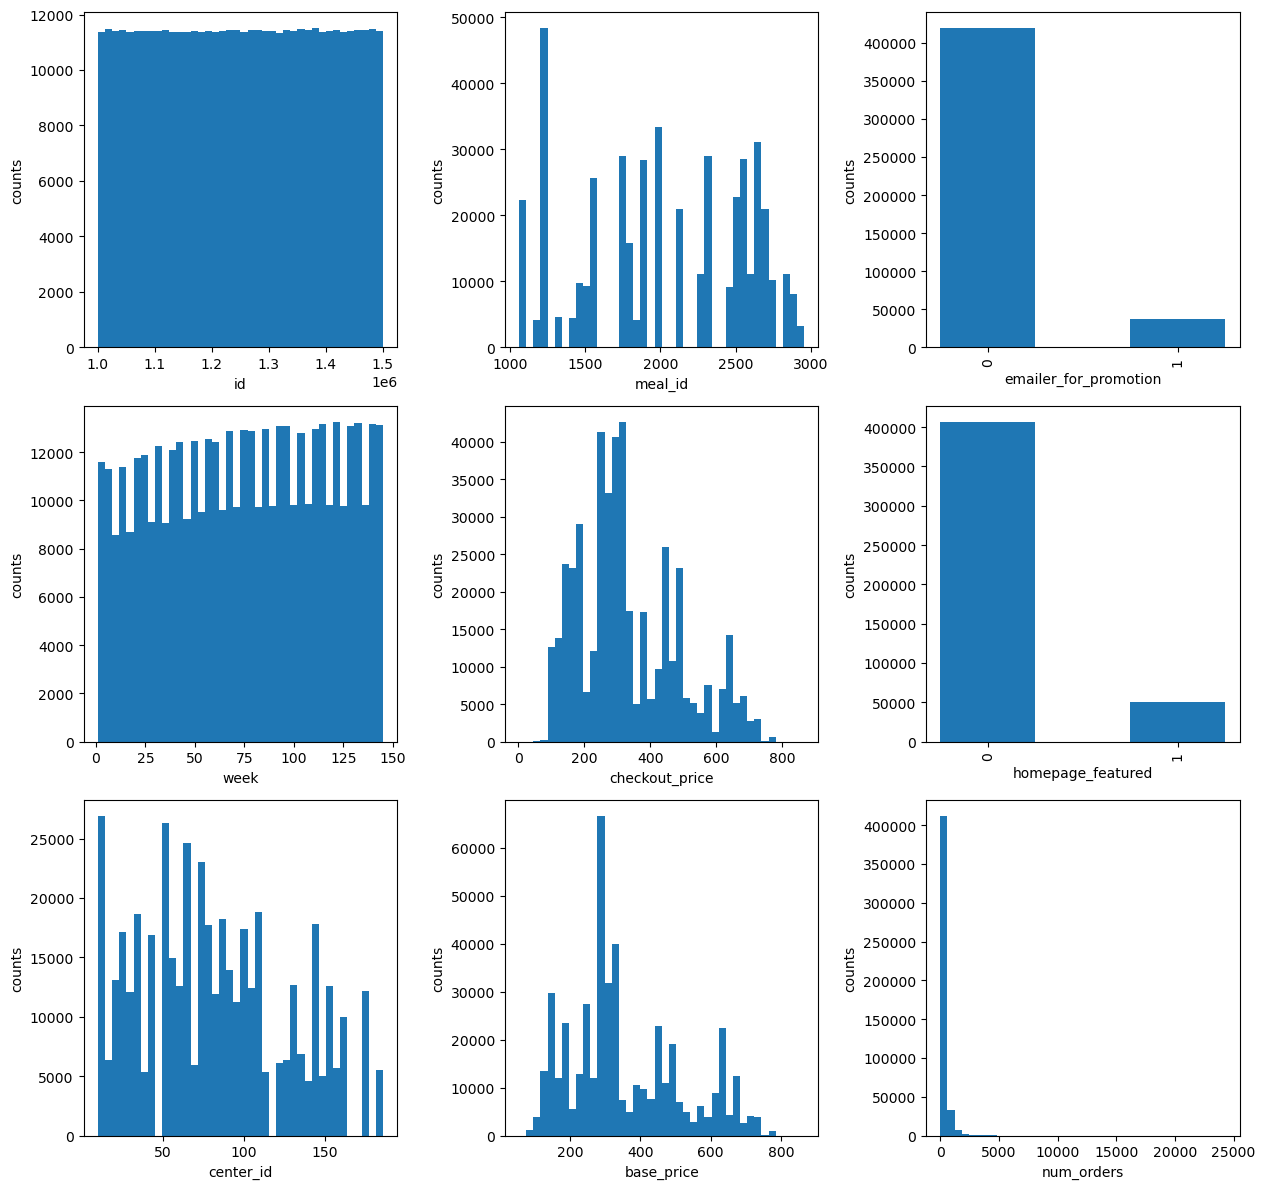

In [10]:
# We use the functions defined above to plot frequency histograms for all features
if plot_data:  
    plot_multiple(df.values, df.columns, targets=df['num_orders'], target_label='num_orders', 
        nbins=40, no_data=np.nan, range_targets=[0., 1500.], cmap=None)

Since we are working with kaggle data and we wish to submit our answers for the test set, we have two options:
1. We can run and tune the hyperparameters without the test set (test_run == False)
2. we can perform a final run with the test set (test_run == True)
The data we work with is temporal data where the test set includes unseen future weeks so we divide the data accordingly.

In [13]:
########## set up the time intervals that define the validation, training and kaggle data ##########
weeks_1 = df[t_var].min()  # first sample
weeks_train_n = df[t_var].max()  # last sample
df_test = pd.read_csv('food_Demand_test.csv')
last_week_kaggle = df_test[t_var].max()  # last kaggle sample
assert df_test[t_var].min() > weeks_train_n
if test_run:  # merge both train and test dataframes
    # check that max week in train df is less than min week in test df

    submissions = pd.read_csv('sample_submission.csv')
    assert all(submissions['id'] == df_test['id'])  # example submissions already ordered 
    
    df = pd.concat((df, df_test), axis=0)  # avoids errors later if manipulating df_test and df_tree differently
    weeks_n = df_test[t_var].max()  # last sample
else:
    weeks_n = weeks_train_n  # last sample
    if num_test:
        weeks_train_n = weeks_n - (last_week_kaggle - weeks_n)  # the cross-validation time-frame is the same as for kaggle predictions
    else:
        weeks_train_n = int(weeks_n * frac_train)
weeks = np.arange(weeks_1, weeks_n+1)  # all possible samples

In [15]:
# first week and last week of training set, last week for testing
print(weeks_1, weeks_train_n, weeks_n)

1 135 145


In [16]:
# merge the columns from all of the datasets to see if there is additional information 
# that can help the model more accurately 
df = df.merge(meal, on='meal_id')
df = df.merge(ful, on='center_id')
df.head()

# make the last column the target we want to predict
df_targets = df.pop(target_feature)
df = df.join(df_targets)
df.head()

id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1018704     2         55     1885          135.83      152.29   
2  1196273     3         55     1885          132.92      133.92   
3  1116527     4         55     1885          135.86      134.86   
4  1343872     5         55     1885          146.50      147.50   

   emailer_for_promotion  homepage_featured   category cuisine  city_code  \
0                      0                  0  Beverages    Thai        647   
1                      0                  0  Beverages    Thai        647   
2                      0                  0  Beverages    Thai        647   
3                      0                  0  Beverages    Thai        647   
4                      0                  0  Beverages    Thai        647   

   region_code center_type  op_area  num_orders  
0           56      TYPE_C      2.0         177  
1           56      TYPE_C      2.0         323  
2           56      TYPE_C      2.0          96  
3           56      TYPE_C      2.0         163  
4           56      TYPE_C      2.0         215

In [17]:
# We find that single timeseries are uniquely identified using ['center_id', 'meal_id'] 
# Below we create a dictionary to map ('center_id', 'meal_id') tuples to corresponding 
# rows in the pandas dataframe to extract the timeseries 
unique_cols = ['center_id', 'meal_id']
def apply_unique_ts_map(df, unique_cols):
    """ 
    return:
            ts_inds_inv: timeseries index map for rows in DF (shape = DF.shape[0])
            unique_vals: dictionary with key=('center_id', 'meal_id') and value=time-series index
    """
    unique_vals = {}
    ts_inds_inv = []
    num_ts = 0
    for ind, cur in enumerate(df[unique_cols].values):
        cur = tuple(cur)
        if cur not in unique_vals:
            unique_vals[cur] = num_ts
            num_ts += 1
        val = unique_vals[cur]
        ts_inds_inv.append(val)
    return ts_inds_inv, unique_vals

# this populates the dictionary map to identify each row of the dataframe with the keys
ts_inds_inv, unique_vals = apply_unique_ts_map(df, unique_cols)
num_ts = len(unique_vals)  # the number of timeseries in the dataframe
if num_losses == 0:  # use all of the data (final run-through)
    num_losses = num_ts

In [18]:
# We convert all category objects to natural number values for 
# simpler computational logic, e.g. [0, 1, 2, ..., C]
def apply_unique_cats(df, categorical_features):
    cat_codes = {}
    df_copy = df.copy()
    for cat_feature in categorical_features:
        df_copy[cat_feature], cat_values = df_copy[cat_feature].factorize(sort=True)
        cat_codes[cat_feature] = cat_values
    return df_copy, cat_codes

df_copy, cat_codes = apply_unique_cats(df, categorical_features)
df_copy = pd_read_csv_stats_describe(in_df=df_copy)



None - data in first 10 rows
        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         23       22          136.83      152.29   
1  1018704     2         23       22          135.83      152.29   
2  1196273     3         23       22          132.92      133.92   
3  1116527     4         23       22          135.86      134.86   
4  1343872     5         23       22          146.50      147.50   
5  1493612     6         23       22          146.53      146.53   
6  1110832     7         23       22          145.53      146.53   
7  1461167     8         23       22          146.53      145.53   
8  1102364     9         23       22          134.83      134.83   
9  1018130    10         23       22          144.56      143.56   

   emailer_for_promotion  homepage_featured  category  cuisine  city_code  \
0                      0                  0         0        3         30   
1                      0                  0         0        3    

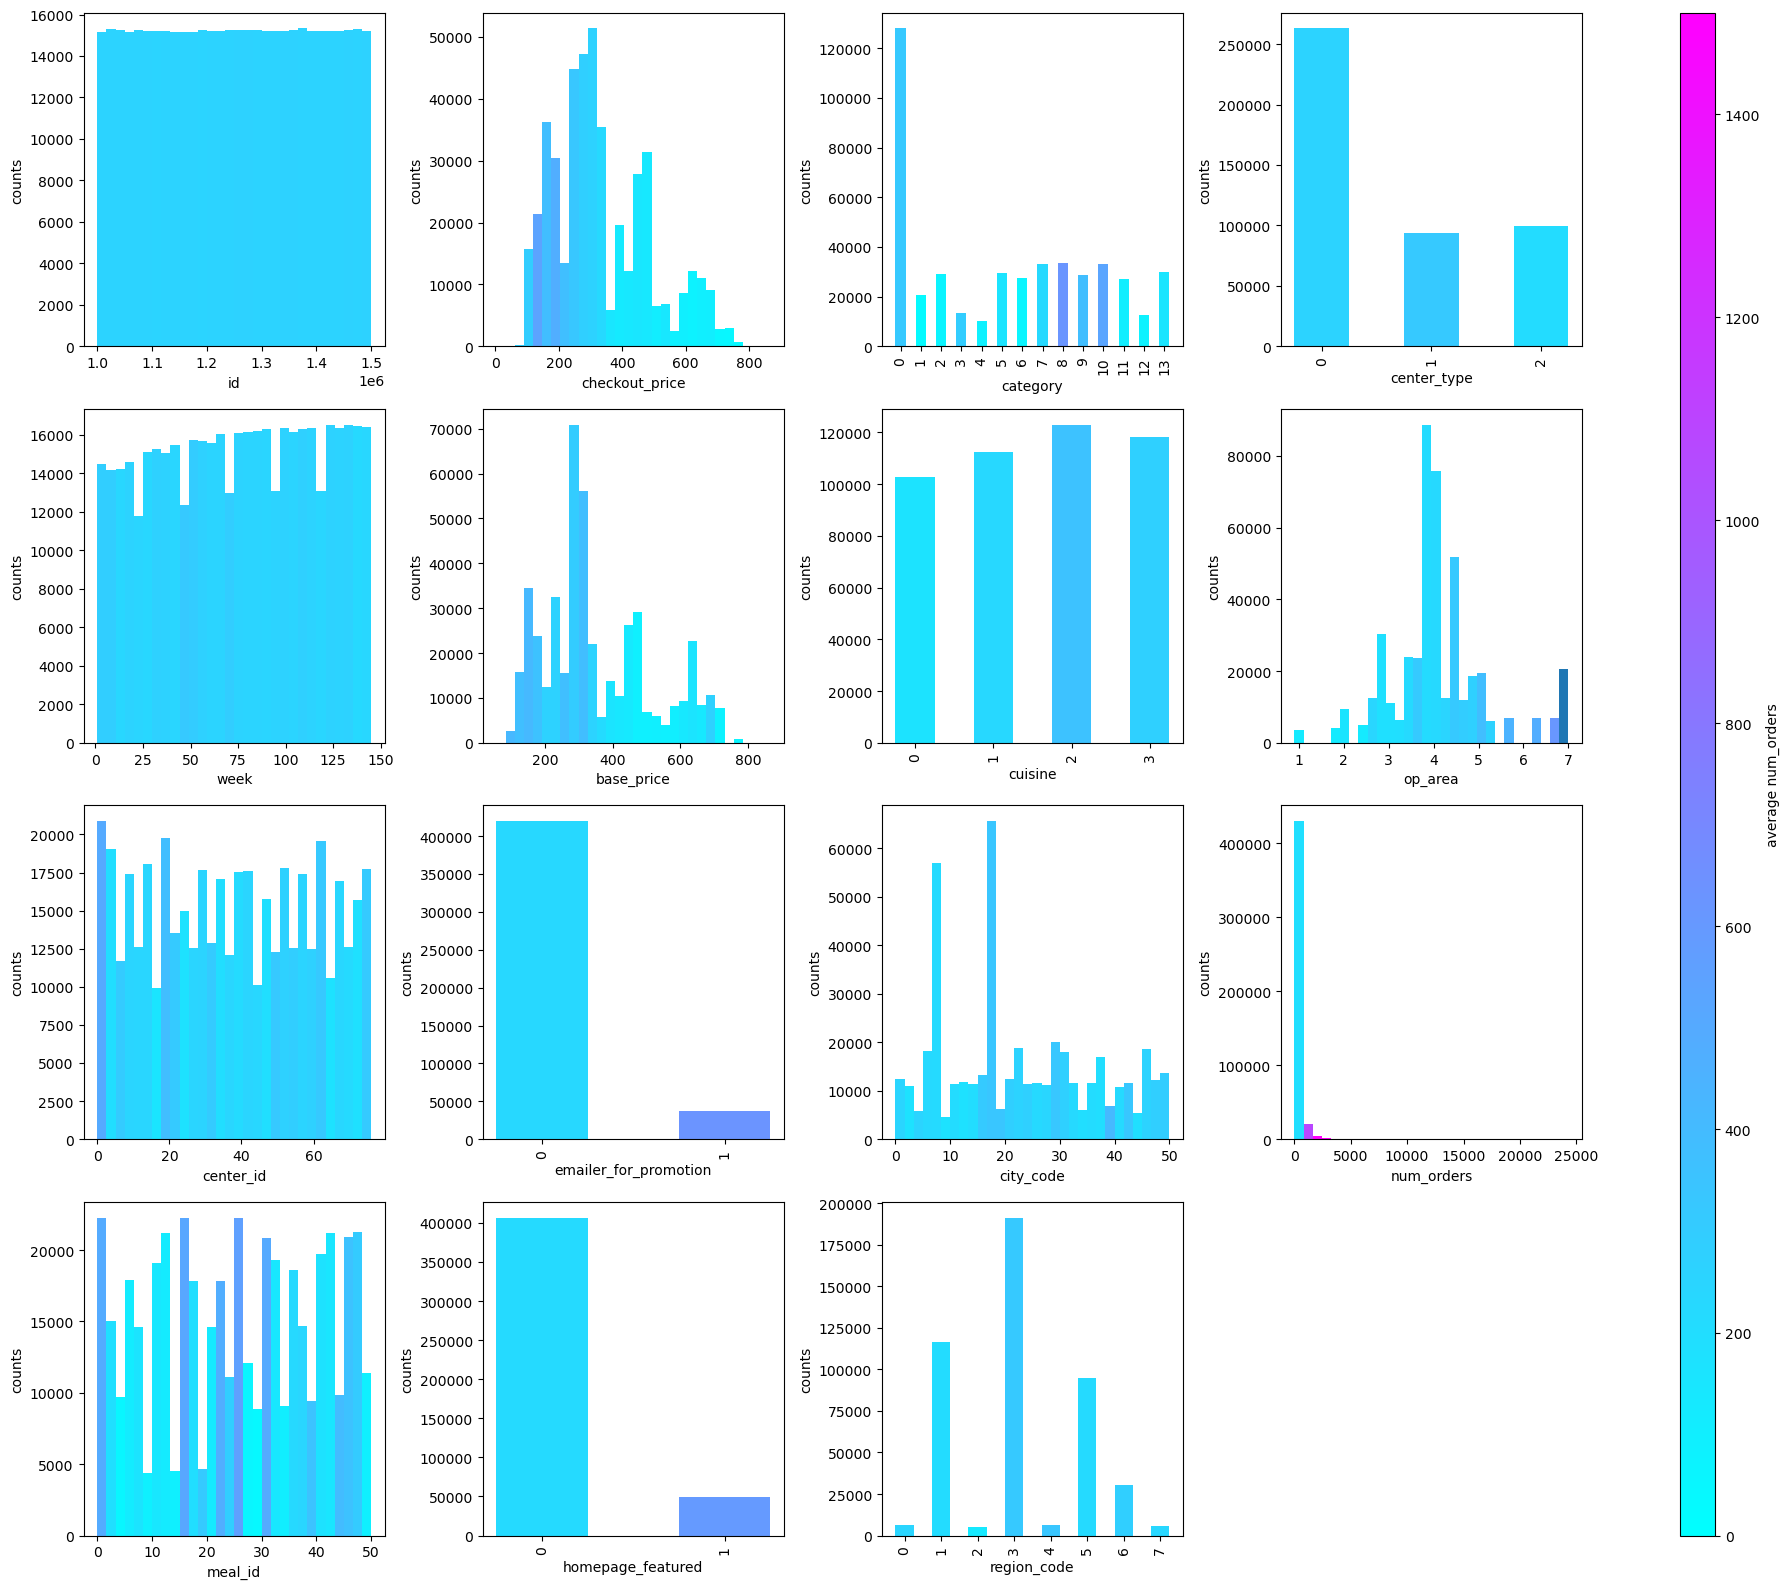

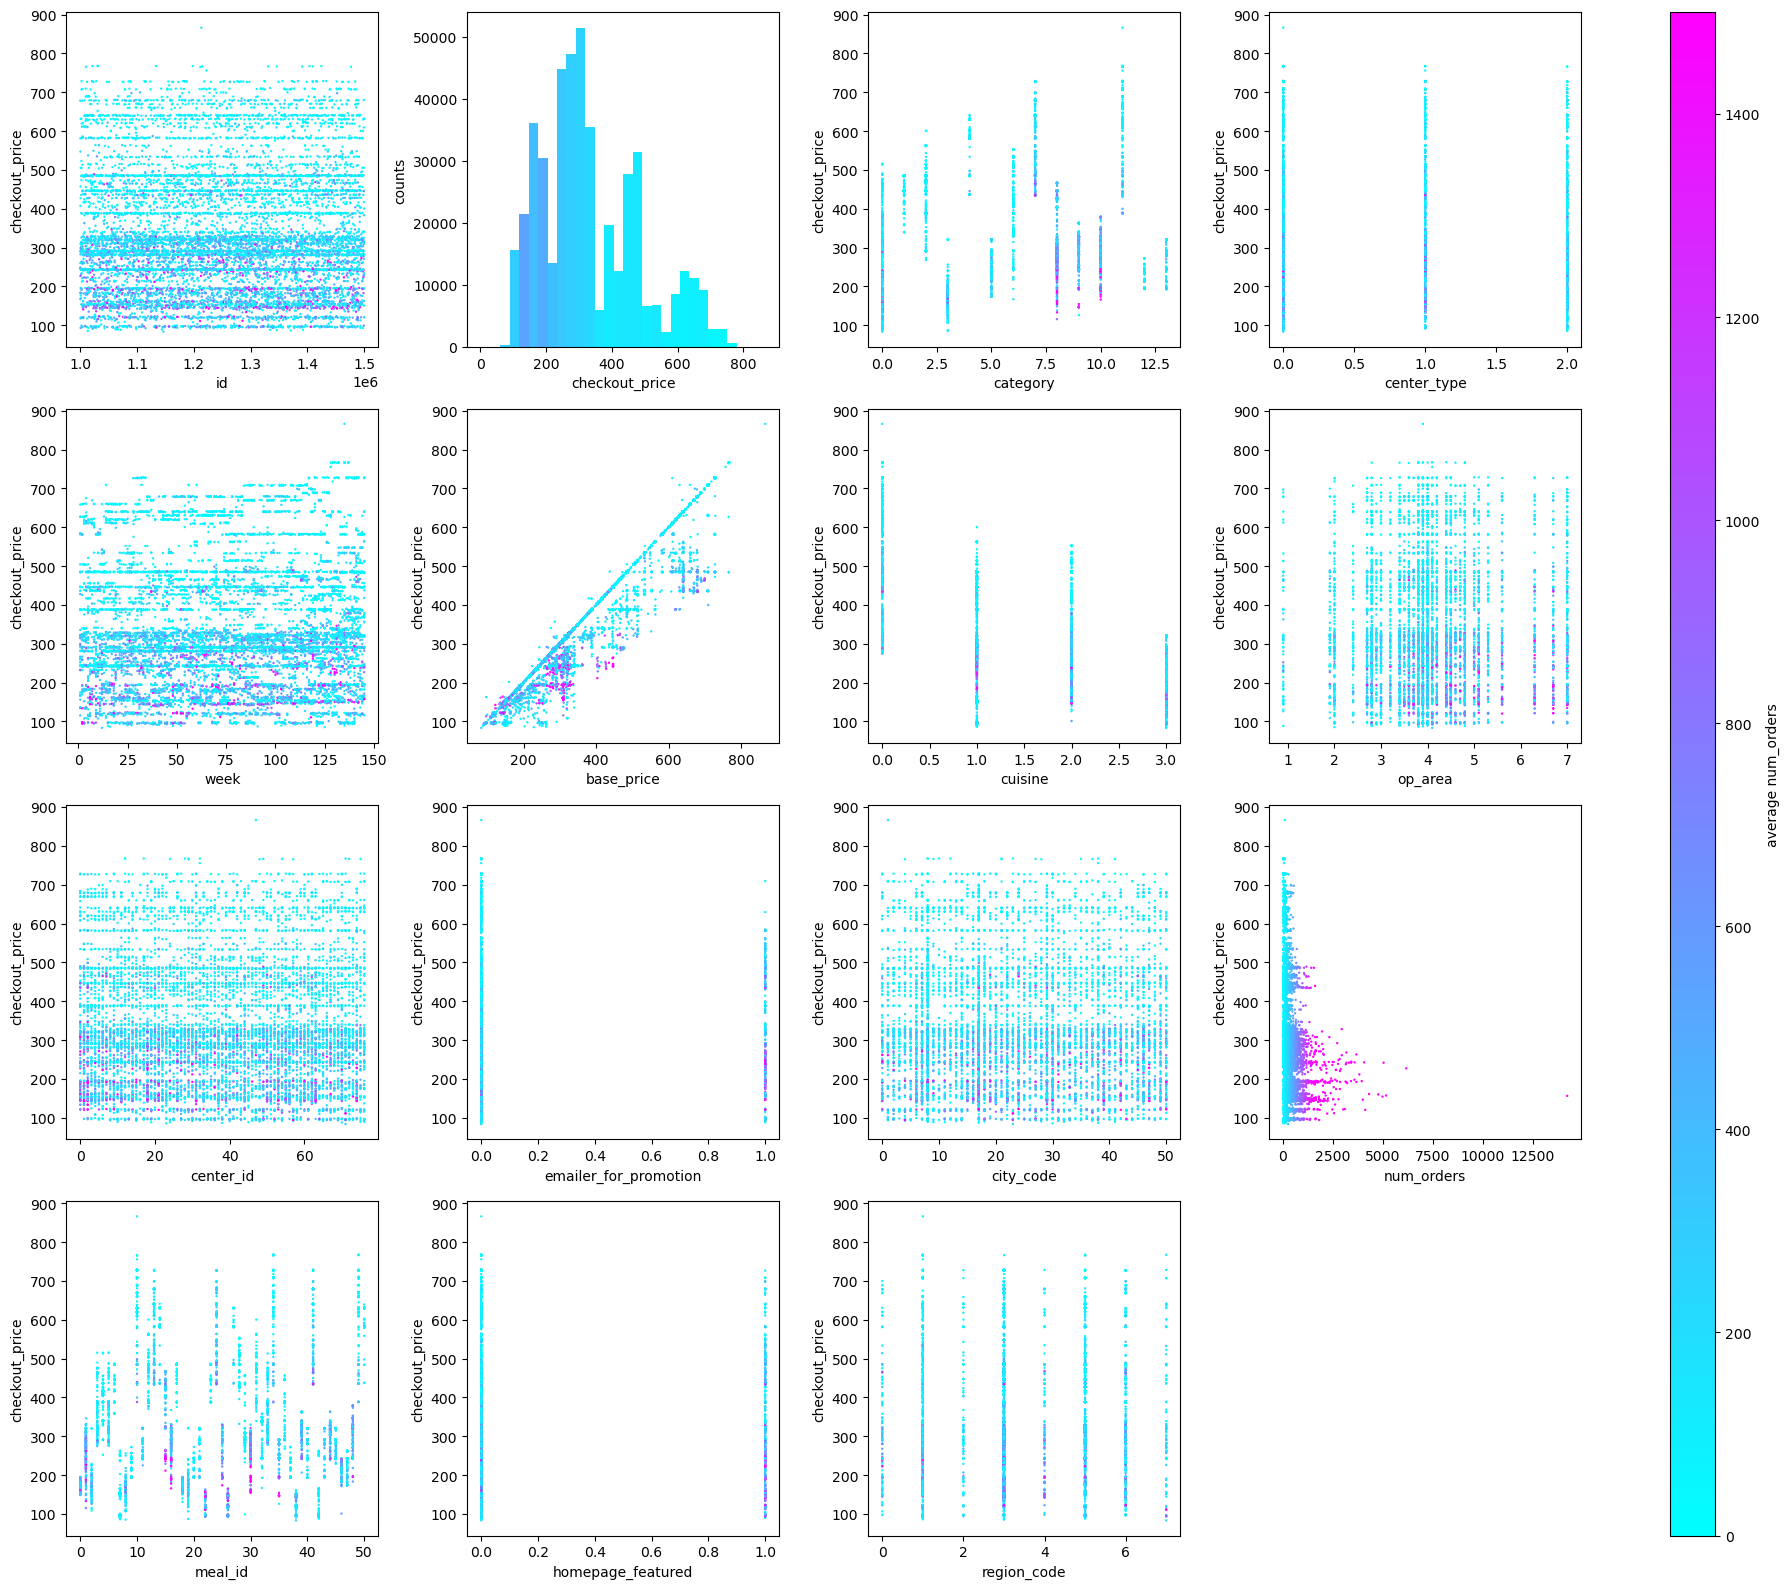

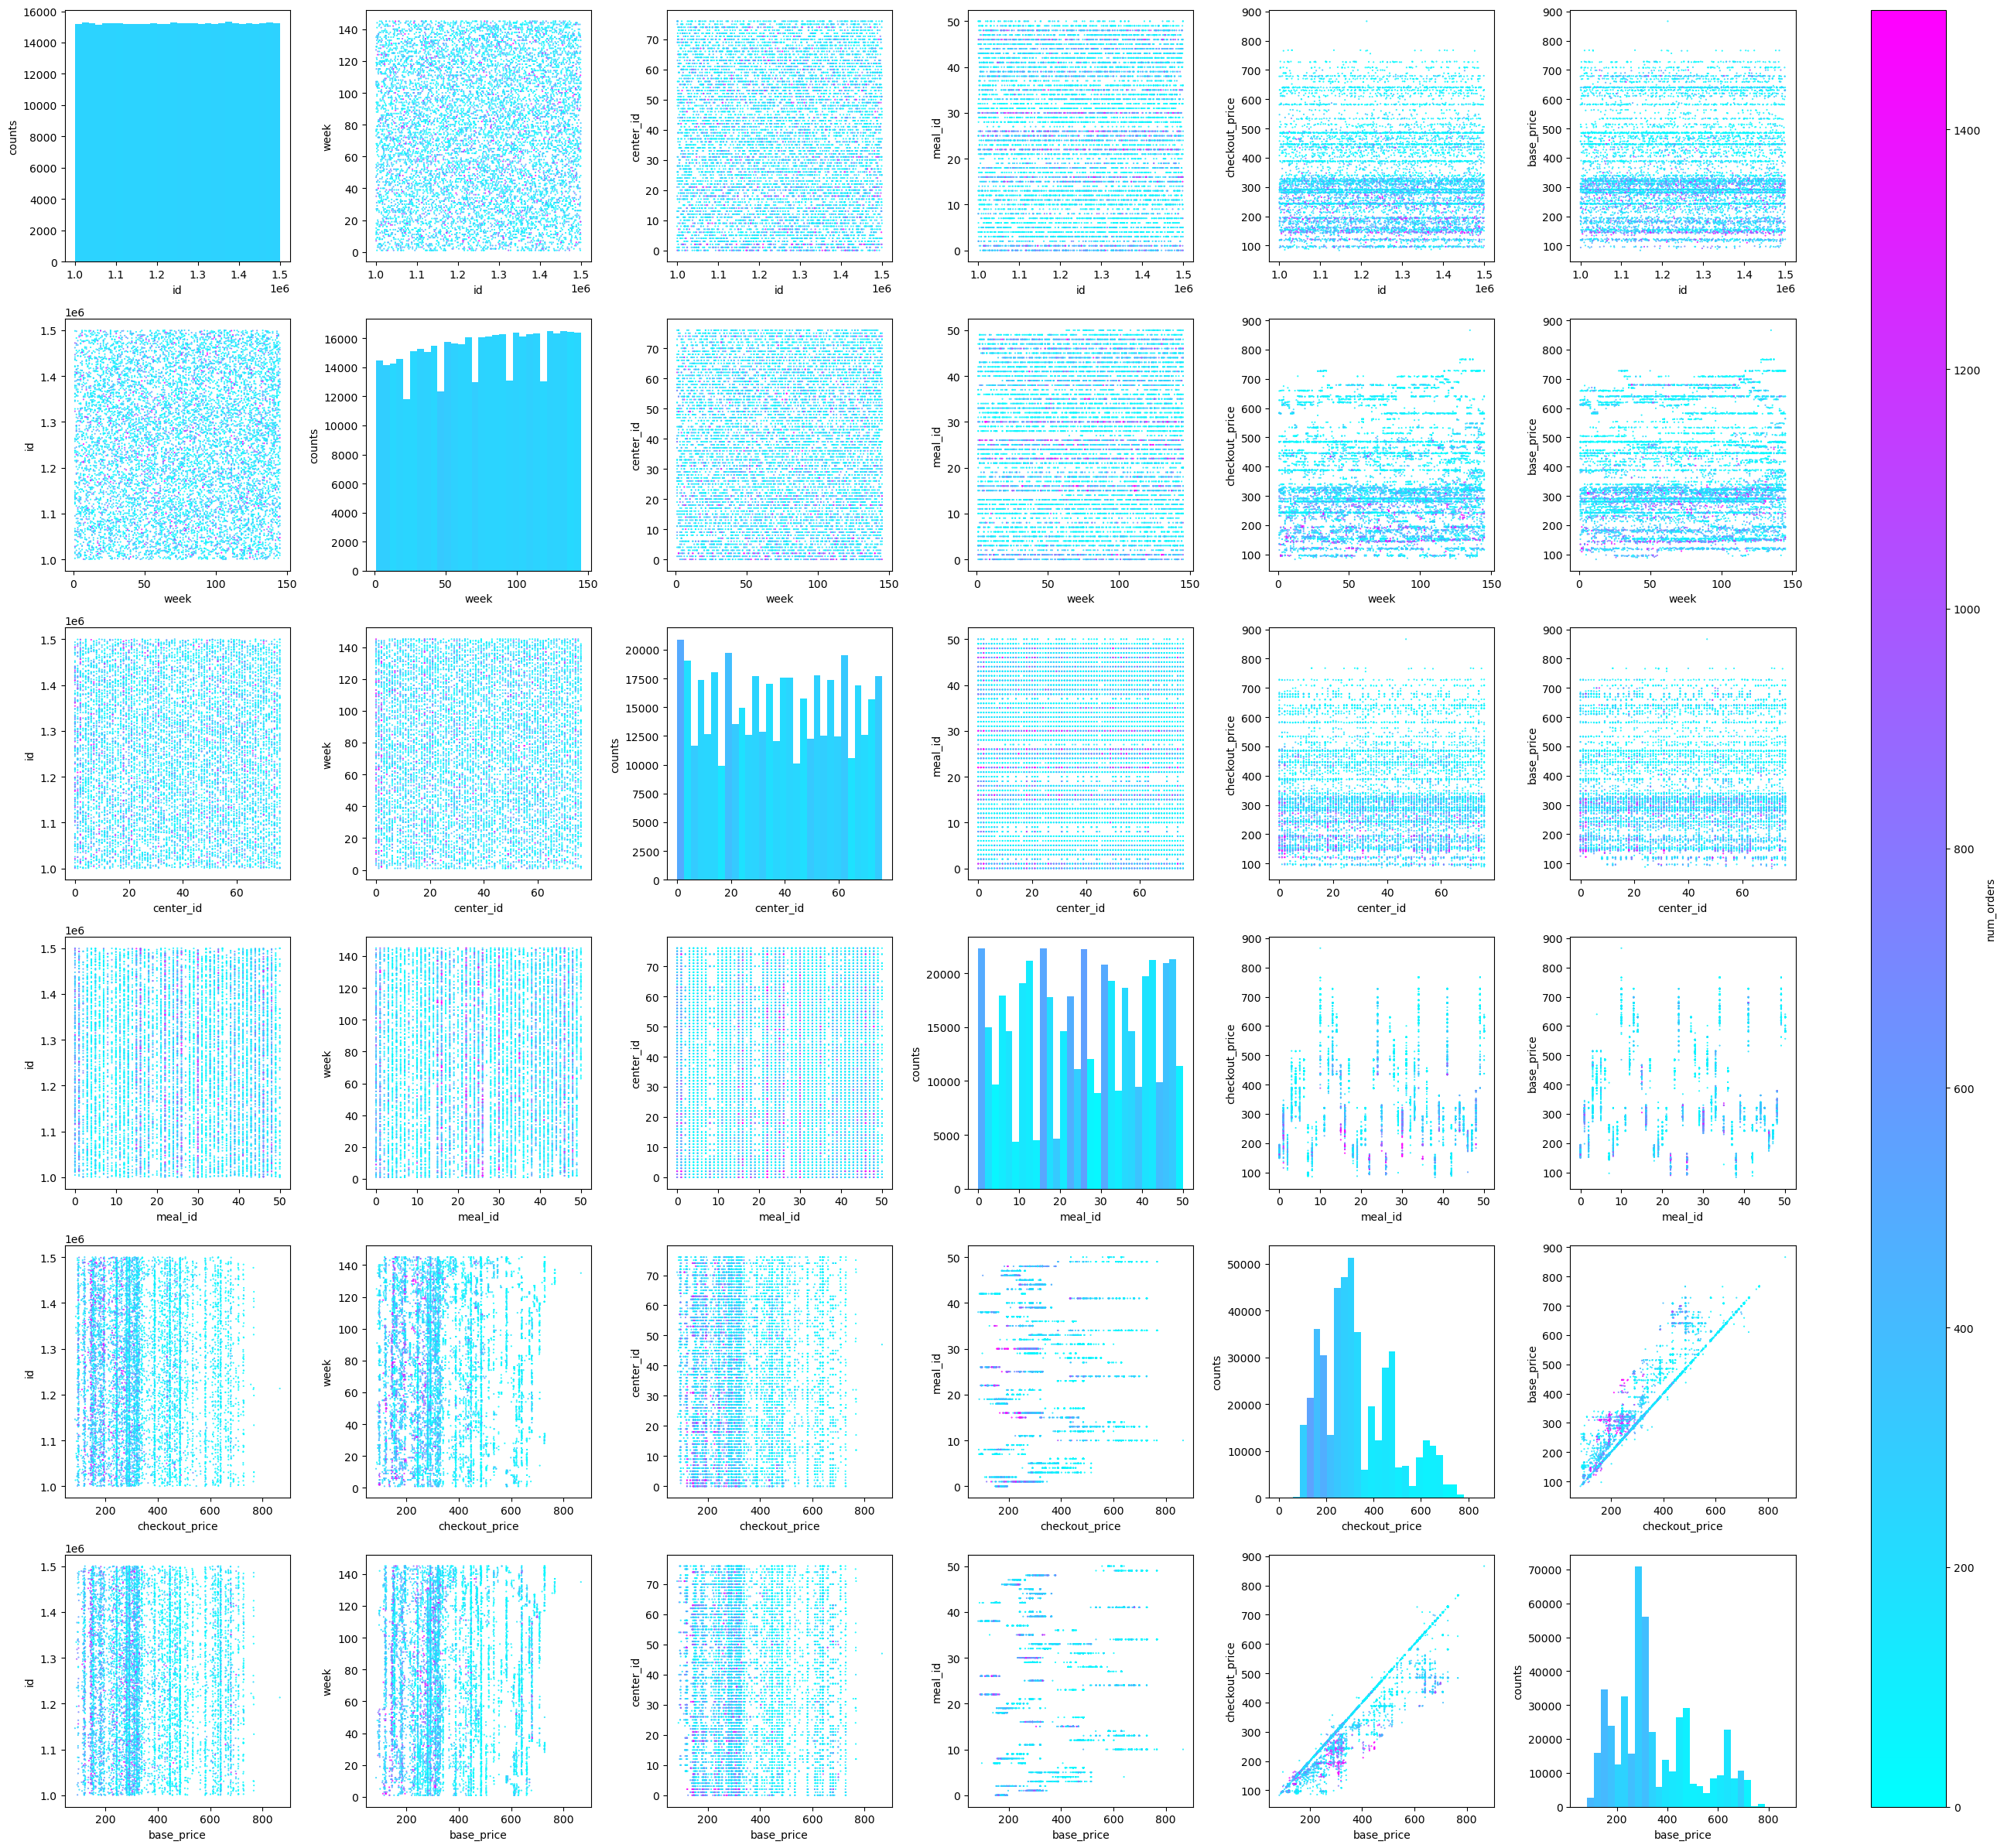

In [19]:
# plot histograms and scatter-plots of features to look for correlations
if plot_data:  
    plot_multiple(df_copy[df_copy.columns].values, df_copy.columns, targets=df_copy['num_orders'], target_label='num_orders', 
            nbins=30, no_data=-1, range_targets=[0., 1500.], cmap=mpl.cm.cool)
    plot_multiple(df_copy[df_copy.columns].values, df_copy.columns, ylabel='checkout_price', targets=df_copy['num_orders'], 
            target_label='num_orders', nbins=30, no_data=-1, range_targets=[0., 1500.], cmap=mpl.cm.cool)
    plot_corr_data_verses_target(df_copy[df_copy.columns[:6]].values, labels=df_copy.columns[:6], targets=df_copy['num_orders'], 
            target_label='num_orders', nbins=30, no_data=-1, ax_size=4., range_targets=[0, 1500], cmap=mpl.cm.cool)